In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from IPython.display import display, Math, Latex

# РАСЧЕТНО-ГРАФИЧЕСКАЯ РАБОТА №2<br>по дисциплине "Системы и сети"

<div style="border: 3px solid #2E86AB; border-radius: 15px; padding: 30px; margin: 20px 0; background: linear-gradient(135deg, #F8F9FA 0%, #E9ECEF 100%); box-shadow: 0 8px 32px rgba(46,134,171,0.3);">

<div style="text-align: center; font-family: 'Times New Roman', serif;">

<h2 style="color: #1B263B; font-size: 28px; font-weight: bold; margin: 0 0 20px 0; text-transform: uppercase; letter-spacing: 2px;">
МИНИСТЕРСТВО НАУКИ И ВЫСШЕГО ОБРАЗОВАНИЯ РФ<br>
ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ АВТОНОМНОЕ<br>
ОБРАЗОВАТЕЛЬНОЕ УЧРЕЖДЕНИЕ ВЫСШЕГО ОБРАЗОВАНИЯ
</h2>

<h3 style="color: #2E86AB; font-size: 24px; font-weight: bold; margin: 0 0 15px 0; text-transform: uppercase;">
"УРАЛЬСКИЙ ФЕДЕРАЛЬНЫЙ УНИВЕРСИТЕТ<br>
ИМЕНИ ПЕРВОГО ПРЕЗИДЕНТА РОССИИ Б.Н. ЕЛЬЦИНА"
</h3>

«Методы расчета установившихся режимов кольцевых электрических сетей»


Вариант 11

</div>

<div style="display: flex; justify-content: space-between; margin: 40px 0; font-family: 'Times New Roman', serif; font-size: 16px;">

<div style="text-align: left; width: 48%;">
<p><strong>Выполнил:</strong></p>
<p>Студент 3-го курса<br>
Группа ЭН-330004<br>
<span style="font-weight: bold;">Пирожков М.И.</span></p>
</div>

<div style="text-align: right; width: 48%;">
<p><strong>Проверил:</strong></p>
<p>к.т.н., доцент<br>
<span style="font-weight: bold;">Валиев Р.Т.</span></p>
</div>

</div>

<div style="text-align: center; margin-top: 60px; font-family: 'Times New Roman', serif; font-size: 18px; color: #1B263B;">
<p style="margin: 0;"><strong>ЕКАТЕРИНБУРГ</strong></p>
<p style="margin: 0; font-size: 20px; font-weight: bold;">2025</p>
</div>

</div>


## Исходные данные

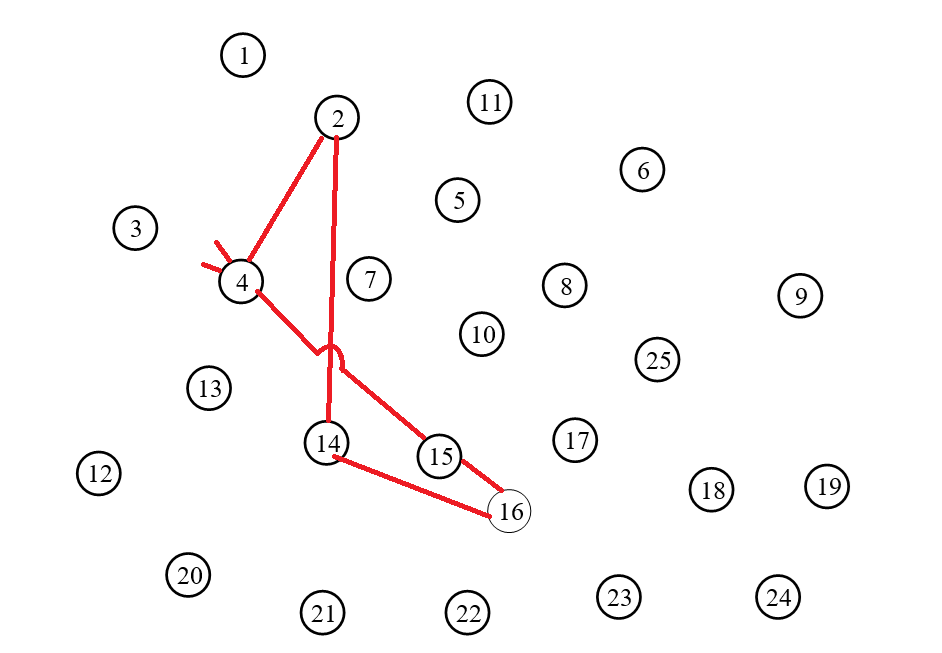

| Вариант | Номер          |      | Параметры нагрузок |        |      |      |        |      |      |        |      |     |        |
|---------|----------------|------|--------------------|--------|------|------|--------|------|------|--------|------|-----|--------|
|         | базисного узла | №    | Р,                 | cos j, | №    | Р,   | cos j, | №    | Р,   | cos j, | №    | Р,  | cos j, |
|         |                | узла | узла               | МВт    | узла | узла | МВт    | узла | узла | МВт    | узла | МВт | узла   |
| 11      | 4              | 2    | 37                 | 0,90   | 14   | 26   | 0,90   | 16   | 26   | 0,90   | 15   | 15  | 0,88   |

In [ ]:
# Узел 2
P_2 = 37
cos_j_2 = 0.9

# Узел 14
P_14 = 26
cos_j_14 = 0.9

# Узел 16
P_16 = 26
cos_j_16 = 0.9

# Узел 15
P_15 = 15
cos_j_15 = 0.88

## Начнём с расчёта нагрузки в узлах

Для расчёта применим формулу

$
Q = P \cdot \tan{\arccos{\cos{\varphi}}}
$

In [ ]:
Q_2 = P_2 * np.tan(np.arccos(cos_j_2))

S_2 = P_2 + Q_2*1j

Q_14 = P_14 * np.tan(np.arccos(cos_j_14 ))

S_14 = P_14 + Q_14*1j

Q_16 = P_16 * np.tan(np.arccos(cos_j_16 ))

S_16 = P_16 + Q_16*1j

Q_15 = P_15 * np.tan(np.arccos(cos_j_15 ))

S_15 = P_15 + Q_15*1j

In [ ]:
print(f"""
$S_2$ = {S_2:.2f} \n
$S_14$ = {S_14:.2f} \n
$S_16 = {S_16:.2f} \n
$S_15$ = {S_15:.2f}
""")


$S_2$ = 37.00+17.92j 

$S_14$ = 26.00+12.59j 

$S_16 = 26.00+12.59j 

$S_15$ = 15.00+8.10j



## Выбор трансформатора

Для выбора нагрузки применим формулу
$
S = \dfrac{P}{\cos{\varphi}}
$

При этом
$
S_{tr} = \dfrac{S}{1.4}
$

Поэтому рассчитаем мощности и подберём трансформаторы

In [ ]:
S_nagr2 = P_2/cos_j_2
S_tr2 = S_nagr2/1.4

S_tr2

29.365079365079364

Выберем трансформатор 2×ТРДН-40000/110/10,5

так как 40>29

In [ ]:
S_nagr14 = P_14/cos_j_14
S_tr14 = S_nagr14/1.4

S_tr14

20.634920634920636

2×ТРДН-25000/110/10,5

так как 25>20.6

In [ ]:
S_nagr16 = P_16/cos_j_16
S_tr16 = S_nagr16/1.4

S_tr16

20.634920634920636

2×ТРДН-25000/110/10,5

так как 25>20.6

In [ ]:
S_nagr15 = P_15/cos_j_15
S_tr15 = S_nagr15/1.4

S_tr15

12.175324675324678

2×ТДН-16000/110/11

так как 16>12.175

Запишем результаты:

Узел 2: 2×ТРДН-40000/110/10,5

Узел 14: 2×ТРДН-25000/110/10,5

Узел 16: 2×ТРДН-25000/110/10,5

Узел 15: 2×ТРДН-16000/110/10,5

## Расчет параметров схемы замещения трансформатора

ТРДН-40000/110/10,5

In [ ]:
U_BH_tr1 = 115
U_HH_tr1 = 10.5
R_tr1 = 1.4
X_tr1 = 34.7

U_k_tr1 = 10.5
Delta_P_k_tr1 = 0.172
Delta_P_x_tr1 = 0.036
I_x_tr1 = 0.65
Delta_Qx1 = 0.260

K_t1 = U_HH_tr1/U_BH_tr1

Delta_Sx1 = (Delta_P_x_tr1 + Delta_Qx1)*2

print(f'K_tr1 = {K_t1:.3f}')

K_tr1 = 0.091


ТРДН-25000/110/10,5

In [ ]:
U_BH_tr2 = 115
U_HH_tr2 = 10.5
R_tr2 = 2.54
X_tr2 = 55.9

U_k_tr2 = 10.5
Delta_P_k_tr2 = 0.120
Delta_P_x_tr2 = 0.027
I_x_tr2 = 0.7
Delta_Qx2 = 0.175

K_t2 = U_HH_tr2/U_BH_tr2
K_t3 = K_t2

Delta_Sx2 = (Delta_P_x_tr2 + Delta_Qx2)*2
Delta_Sx3 = Delta_Sx2

print(f'K_tr2 = {K_t2:.3f}')

K_tr2 = 0.091


ТРДН-16000/110/10,5

In [ ]:
U_BH_tr4 = 115
U_HH_tr4 = 11
R_tr4 = 4.38
X_tr4 = 86.7

U_k_tr4 = 10.5
Delta_P_k_tr4 = 0.085
Delta_P_x_tr4 = 0.019
I_x_tr4 = 0.7
Delta_Qx4 = 0.112

K_t4 = U_HH_tr4/U_BH_tr4

Delta_Sx4 = (Delta_P_x_tr4 + Delta_Qx4)*2

print(f'K_t4r = {K_t4:.3f}')

K_t4r = 0.096


Рассчитаем сопротивления трансформаторов

In [ ]:
Z_tr1 = (R_tr1 + X_tr1*1j)/2
Z_tr2 = (R_tr2 + X_tr2*1j)/2
Z_tr3 = Z_tr2
Z_tr4 = (R_tr4 + X_tr4*1j)/2

print(f'$Z_{{tr1}} = {Z_tr1}$')
print(f'$Z_{{tr2}} = {Z_tr2}$')
print(f'$Z_{{tr3}} = {Z_tr3}$')
print(f'$Z_{{tr4}} = {Z_tr4}$')

$Z_{tr1} = (0.7+17.35j)$
$Z_{tr2} = (1.27+27.95j)$
$Z_{tr3} = (1.27+27.95j)$
$Z_{tr4} = (2.19+43.35j)$


$Z_{tr1} = (0.7+17.35j)$

$Z_{tr2} = (1.27+27.95j)$

$Z_{tr3} = (1.27+27.95j)$

$Z_{tr4} = (2.19+43.35j)$